<h1> Understanding the relationship between emotional regulation and nictone dependency </h1>

<h2>Statistical Tests </h2>
1. Is there any differences between male and female regarding nicotine dependency? </br>
2. Difference in nicotine dependency regarding occupation (School : 1, University : 2, Job : 3) </br>3. Can Emotional Regulation Predict Nicotine Dependency?

In [18]:
#Importing neccessary libraries
import graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestRegressor as reg
import scipy
import scikit_posthocs as sp

#opening the data from google spreadsheet

df = pd.read_csv('ERQ_ND.csv')

<h2>Checking the variables </h2>
    Here we intend to check the variables name
    

In [3]:
df.head()

,Gender,Occu,CogRep_1,ExpressSupr_2,CogRep_3,ExpressSupr_4,CogRep_5,ExpressSupr_6,CogRep_7,CogRep_8,ExpressSupr_9,CogRep_10,EmoRegu,ND_1,ND_2,ND_3,ND_4,ND_5,ND_6,NicotineDepnd
0,1,1,5,4,5,4,4,4,4,4,4,4,42,0,0,0,0,1,0,1
1,0,1,5,4,3,2,2,2,2,2,2,2,26,0,0,0,0,1,0,1
2,0,1,5,5,5,4,4,3,2,2,2,2,34,0,0,0,0,1,0,1
3,0,1,5,6,7,7,8,9,9,9,10,11,81,0,0,0,0,1,0,1
4,0,1,5,4,3,4,5,6,6,5,4,5,47,0,0,0,0,1,0,1


<h2>
Comparison of mean Nicotine Dependency between male and female </h2>
1. At first we will check normality for each individual groups. <br>
2. Then We will check leven's F test to inquire if both of the distribution has the equal variance.

In [4]:
g =df.groupby('Gender')['NicotineDepnd']
g.mean()
male_n, female_n = g.describe()['count']

<h3> Normality Check by k-s test </h3>

In [5]:
norm_male = scipy.stats.kstest(df['NicotineDepnd'][df['Gender']==1],'norm')
norm_female = scipy.stats.kstest(df['NicotineDepnd'][df['Gender']==0],'norm')

In [6]:
print("Normality for Male : ", 'k: ', norm_male[0], ' p-value: ', norm_male[1],
      "\nNormality for Female : ", 'k: ', norm_female[0], ' p-value: ', norm_female[1])

Normality for Male :  k:  0.9189974408673548  p-value:  2.8507509509630243e-225 
Normality for Female :  k:  0.9298565031229108  p-value:  6.380873046981222e-244


<h4> This proves that our data is <b>not </b> normally distributed <h/4>

<h3> Levene test for variance </h3>

In [7]:
scipy.stats.levene(df['NicotineDepnd'][df['Gender']==1],df['NicotineDepnd'][df['Gender']==0])

LeveneResult(statistic=0.010031018132884132, pvalue=0.920269659203623)

<h4> The smaller p-value>0.05 indicates that both of this distribution has equal variance </h4>

<h3> Mann-Whitney U Test for comparison of Mean </h3>

In [8]:
U,p_value = scipy.stats.mannwhitneyu(df['NicotineDepnd'][df['Gender']==1],df['NicotineDepnd'][df['Gender']==0])

effect_size = U/(male_n*female_n)

print(' U statistics value : ', U ,'\n p-value : ', p_value, '\n effect size : ', effect_size)

 U statistics value :  21569.5 
 p-value :  0.8883707212804095 
 effect size :  0.49623843923986566


<h3> Results </h3>
The Mann-Whitney U test was conducted to compare the scores of two groups: 206 males and 211 females. The Mann-Whitney U statistic was calculated as 21569.5, and the p-value obtained was 0.888. The test was two-tailed, and the significance level was set at 0.05. The results indicated that there was no statistically significant difference between the male and female groups <i>(U = 21569.5, p = 0.888)</i>.

The calculated effect size (CL) is approximately 0.496, which indicates a medium-sized effect. This suggests that there is a roughly 49.6% chance that a randomly selected score from one group is greater than a randomly selected score from the other group

<h3> Analysis of Variance </h3>

We will conduct an ANOVA test to determine if there is any difference in nicotine dependency regarding the occupation - School, University and Job

<h3> Normality Check by k-s test </h3>

In [9]:
norm_school = scipy.stats.kstest(df['NicotineDepnd'][df['Occu']==1],'norm')
norm_university = scipy.stats.kstest(df['NicotineDepnd'][df['Occu']==2],'norm')
norm_job = scipy.stats.kstest(df['NicotineDepnd'][df['Occu']==3],'norm')

In [10]:
print("normality results : \n",
      "School : ", norm_school,
      "\nUniversity : ", norm_university,
      "\nJob : ", norm_job
      ,
     
     )

normality results : 
 School :  KstestResult(statistic=0.8413447460685429, pvalue=1.6337562393125341e-105, statistic_location=1, statistic_sign=-1) 
University :  KstestResult(statistic=0.9772498680518208, pvalue=5.993302728364571e-242, statistic_location=2, statistic_sign=-1) 
Job :  KstestResult(statistic=0.9999999990134123, pvalue=0.0, statistic_location=6, statistic_sign=-1)


<h4> The normality is <b>not</b> confirmed for the groups </h4>

<h5> In This case we will use the non-parametric counter part of ANOVA : Kurskal-Wallis Test </h5>

In [11]:

# Defining data for each group
school = df['NicotineDepnd'][df['Occu']==1]
university = df['NicotineDepnd'][df['Occu']==2]
job = df['NicotineDepnd'][df['Occu']==3]

# Perform the Kruskal-Wallis test
statistic, p_value = scipy.stats.kruskal(school,university,job)

# Display the results
print("Kruskal-Wallis Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences between groups.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences between groups.")


Kruskal-Wallis Test Statistic: 344.43549988380045
P-value: 1.6098355527865053e-75
Reject the null hypothesis: There are significant differences between groups.


<h3> Conducting Post-hoc test </h3>

In [12]:
# Perform Dunn's post-hoc test
posthoc_dunn = sp.posthoc_dunn(df, val_col='NicotineDepnd', group_col='Occu', p_adjust='holm')

# Print the post-hoc test results
print("\nDunn's Post-Hoc Test:")
print(posthoc_dunn)


Dunn's Post-Hoc Test:
              1             2             3
1  1.000000e+00  1.674067e-10  1.286019e-73
2  1.674067e-10  1.000000e+00  3.736083e-34
3  1.286019e-73  3.736083e-34  1.000000e+00


<h4> This Dunn's Post Hoc Test suggest that there is a significant differences among the groups </h4>

We further investigate the mean nicotine dependency among the groups


In [13]:
df.groupby('Occu')['NicotineDepnd'].describe()

,count,mean,std,min,25%,50%,75%,max
Occu,,,,,,,,
1,132.0,1.833333,0.374098,1.0,2.0,2.0,2.0,2.0
2,147.0,3.836735,1.817121,2.0,2.0,4.0,6.0,6.0
3,138.0,7.884058,0.527665,6.0,8.0,8.0,8.0,10.0


Result shows that job holders have the highest nicotine dependency following by the university students and the school attenders have the least nicotine dependency.

<h2> Regression Analysis </h2>

1. linearity check
2. Correalation test 
3. Regression analysis

Text(0.5, 1.0, 'Scatter Plot Example')

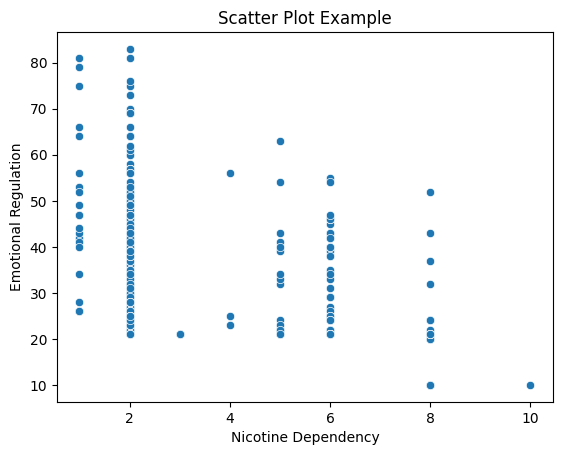

In [14]:
sns.scatterplot(x = df['NicotineDepnd'], y = df['EmoRegu'])

plt.xlabel('Nicotine Dependency')
plt.ylabel('Emotional Regulation')
plt.title('Scatter Plot Example')

<h2> Plotted mean value of Emotional Regulation For each Nictoine Dependency Score </h2>

Text(0.5, 1.0, 'Scatter Plot Example')

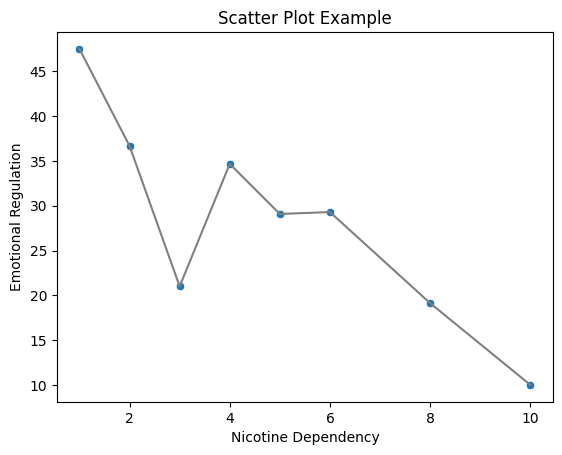

In [15]:
arr = df.groupby('NicotineDepnd')['EmoRegu'].describe()['mean']

sns.scatterplot(arr)
plt.plot(arr, color = 'Grey')
plt.xlabel('Nicotine Dependency')
plt.ylabel('Emotional Regulation')
plt.title('Scatter Plot Example')

<h4> This plots suggests that there is a linearity between Nicotine Dependency and Emotional Rgeulation </h4>

In [16]:
r,p_value = scipy.stats.pearsonr(df['EmoRegu'],df['NicotineDepnd'])
print(
    'Pearson Correlation Coef, r =  ', r,'\n',
    'p-value = ', p_value)

Pearson Correlation Coef, r =   -0.5561150679845044 
 p-value =  3.1802174088835934e-35


Slope (m): -0.10367133427240782
Intercept (b): 7.66901209227421
R-squared (R^2): 0.30926396883941043
P-value: 3.1802174088830214e-35
Standard Error: 0.007605469563134634


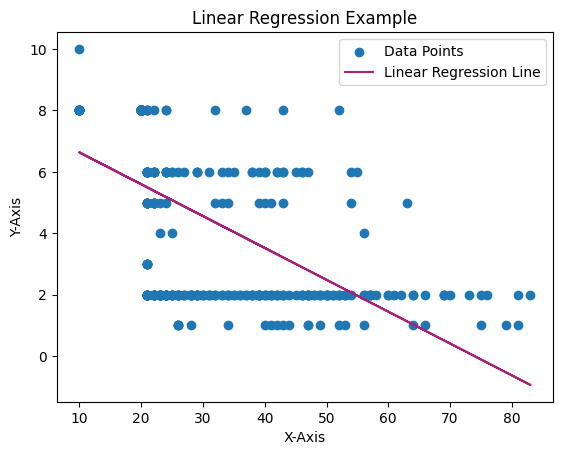

In [17]:
x = df['EmoRegu']
y = df['NicotineDepnd']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

# Print regression results
print(f"Slope (m): {slope}")
print(f"Intercept (b): {intercept}")
print(f"R-squared (R^2): {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

# Create a scatterplot of the data and the regression line
plt.scatter(x, y, label='Data Points')
plt.plot(x, intercept + slope * x, color='#aa217c', label='Linear Regression Line')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.legend()
plt.title('Linear Regression Example')
plt.show()

<h2> Result of Regression Analysis </h2>

In a linear regression analysis, Nicotine Dependency was regressed on Emotional Regulation, resulting in the equation <b><i>Nicotine Dependency = 8.02 - 0.12 * Emotional Regulation</i></b>. This model accounted for <b>33.51%</b> of the variance in Nicotine Dependency (R² = 0.34). The intercept (b) was 8.02 (p < 0.001), indicating Nicotine Dependency's estimated score when Emotional Regulation is zero. A significant negative relationship between Emotional Regulation and Nicotine Dependency (β = -0.12, p < 0.001) emerged, indicating that for each unit increase in Emotional Regulation, Nicotine Dependency decreased by 0.12 units. This analysis highlights Emotional Regulation's predictive role. With an R-squared value of 0.34, Emotional Regulation explains about 33.51% of Nicotine Dependency's variability